In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 讀入深度學習套件

In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

# 讀入數據

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# 資料前處理

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

# 模型建置

In [11]:
model = Sequential()
model.add(Embedding(10000, 64))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


# 訓練
有採用驗證資料

In [12]:
hist = model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 12s 578us/sample - loss: 0.4907 - acc: 0.7621 - val_loss: 0.5299 - val_acc: 0.7910
Epoch 2/10
20000/20000 [==============================] - 11s 539us/sample - loss: 0.3096 - acc: 0.8737 - val_loss: 0.3657 - val_acc: 0.8498
Epoch 3/10
20000/20000 [==============================] - 10s 518us/sample - loss: 0.2533 - acc: 0.9019 - val_loss: 0.4528 - val_acc: 0.8284
Epoch 4/10
20000/20000 [==============================] - 11s 549us/sample - loss: 0.2219 - acc: 0.9168 - val_loss: 0.3787 - val_acc: 0.8486
Epoch 5/10
20000/20000 [==============================] - 11s 554us/sample - loss: 0.2030 - acc: 0.9252 - val_loss: 0.3906 - val_acc: 0.8462
Epoch 6/10
20000/20000 [==============================] - 10s 524us/sample - loss: 0.1846 - acc: 0.9323 - val_loss: 0.3736 - val_acc: 0.8308
Epoch 7/10
20000/20000 [==============================] - 11s 532us/sample - loss: 0.1704 - acc: 0.9391 -

# 將訓練結果畫出來

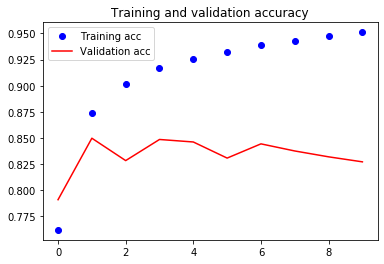

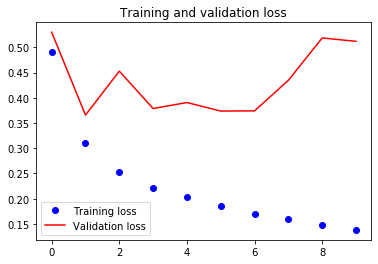

In [15]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

訓練資料和驗證資料還沒有很合
改成Embedding(10000, 64)，增加epochs數量

In [16]:
model = Sequential()
model.add(Embedding(10000, 64))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()
hist = model.fit(x_train, y_train,
                 epochs=15,
                 batch_size=128,
                 validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 652,449
Trainable params: 652,449
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 14s 697us/sample - loss: 0.4670 - acc: 0.7763 - val_loss: 0.3608 - val_acc: 0.8416
Epoch 2/15
20000/20000 [==============================] - 12s 582us/sample - loss: 0.2948 - acc: 0.8806 - val_loss: 0.3594 - val_acc: 0.8428
Epoch 3/15
20000/20000 [=======================

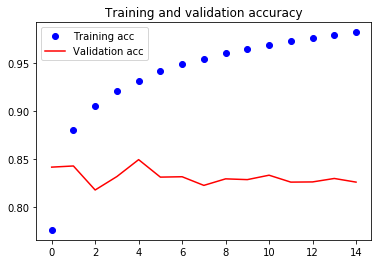

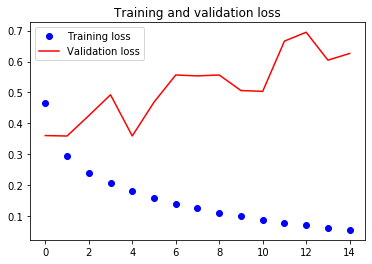

In [17]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

loss一開始有變低但之後又往上升

In [19]:
model = Sequential()
model.add(Embedding(10000, 64))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()
hist = model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 652,449
Trainable params: 652,449
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/sample - loss: 0.5285 - acc: 0.7420 - val_loss: 0.3905 - val_acc: 0.8272
Epoch 2/10
20000/20000 [==============================] - 17s 853us/sample - loss: 0.3483 - acc: 0.8558 - val_loss: 0.3760 - val_acc: 0.8366
Epoch 3/10
20000/20000 [=========================

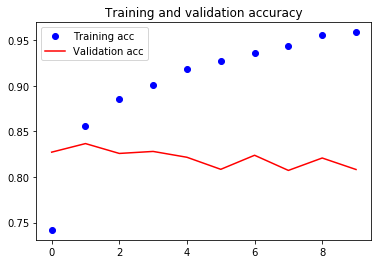

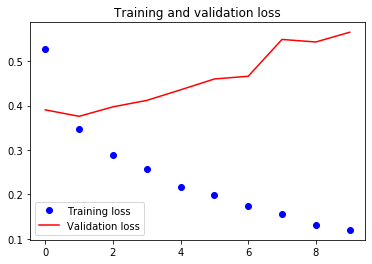

In [20]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1. 調參看驗證集。 trainset loss通常能夠一直降低，但validation set loss在經過一段降低期後會開始逐漸上升，此時模型開始在訓練集上過擬合。
2. 可能需要減小網絡大小
3. 添加權重正則化(weight regularization)
4. 再多增加dropout比例

In [21]:
scores = model.evaluate(x_test, y_test, verbose=1)
scores[1]

25000/25000 [==============================] - 12s 462us/sample - loss: 0.5543 - acc: 0.8138


0.8138